In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle
import math


In [227]:
df = pd.read_csv('/content/Egypt_Houses_Price.csv')

In [228]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [229]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [230]:
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [231]:
df = df[df['Bathrooms'] != 'Unknown']
df = df[df['Bedrooms'] != 'Unknown']
df = df[df['Area'] != 'Unknown']
df = df[df['Price'] != 'Unknown']

In [232]:
df['Area'].replace('Unknown', np.nan)
df['Price'].replace('Unknown', np.nan)
df['Bedrooms'].replace('Unknown', np.nan)
df['Bathrooms'].replace('Unknown', np.nan)



0        3.0
1        3.0
2        2.0
3        2.0
4        3.0
        ... 
27356    2.0
27357    3.0
27358    4.0
27359    4.0
27360    5.0
Name: Bathrooms, Length: 27324, dtype: object

In [233]:
df['Bedrooms'] = df['Bedrooms'].replace('10+', '11')
df['Bathrooms'] = df['Bathrooms'].replace('10+', '11')

In [234]:
df['Area'] = df['Area'].astype(float)
df['Price'] = df['Price'].astype(float)
df['Bedrooms'] = df['Bedrooms'].astype(float)
df['Bathrooms'] = df['Bathrooms'].astype(float)


In [235]:
df['Area']=df['Area'].fillna(df['Area'].mean())
df['Price']=df['Price'].fillna(df['Price'].mean())
df['Bedrooms']=df['Bedrooms'].fillna(df['Bedrooms'].mean())
df['Bathrooms']=df['Bathrooms'].fillna(df['Bathrooms'].mean())



In [236]:
df.dropna()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000.0,3.0,3.0,400.000000,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.000000,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.000000,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000.0,3.0,2.0,230.000000,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.000000,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...,...,...
27356,Town House,890000.0,3.0,2.0,240.000000,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,North Coast
27357,Town House,4000000.0,4.0,3.0,218.000000,Unknown,Unknown,Unknown,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa
27358,Twin House,13800000.0,3.0,4.0,308.000000,No,Unknown,Cairo Festival City,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
27359,Stand Alone Villa,35000000.0,4.0,4.0,478.000000,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Finished,Mokattam


df.isnull().sum()

In [237]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

In [238]:
df["Type"].replace(["Duplex","Apartment","Town House","Stand Alone Villa"], [1,2,3,4], inplace=True)

<ipython-input-239-34bd82db6c23>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


<Axes: >

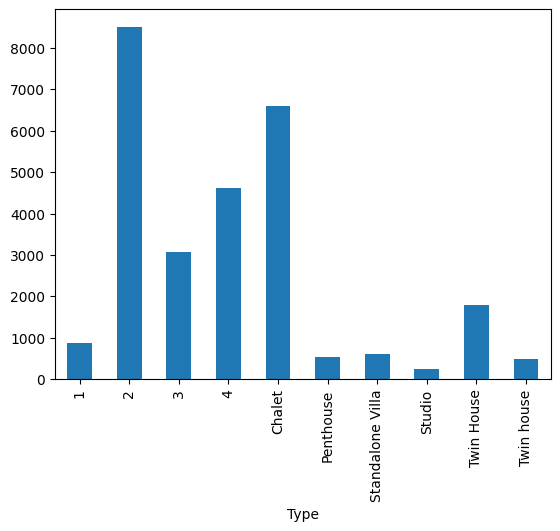

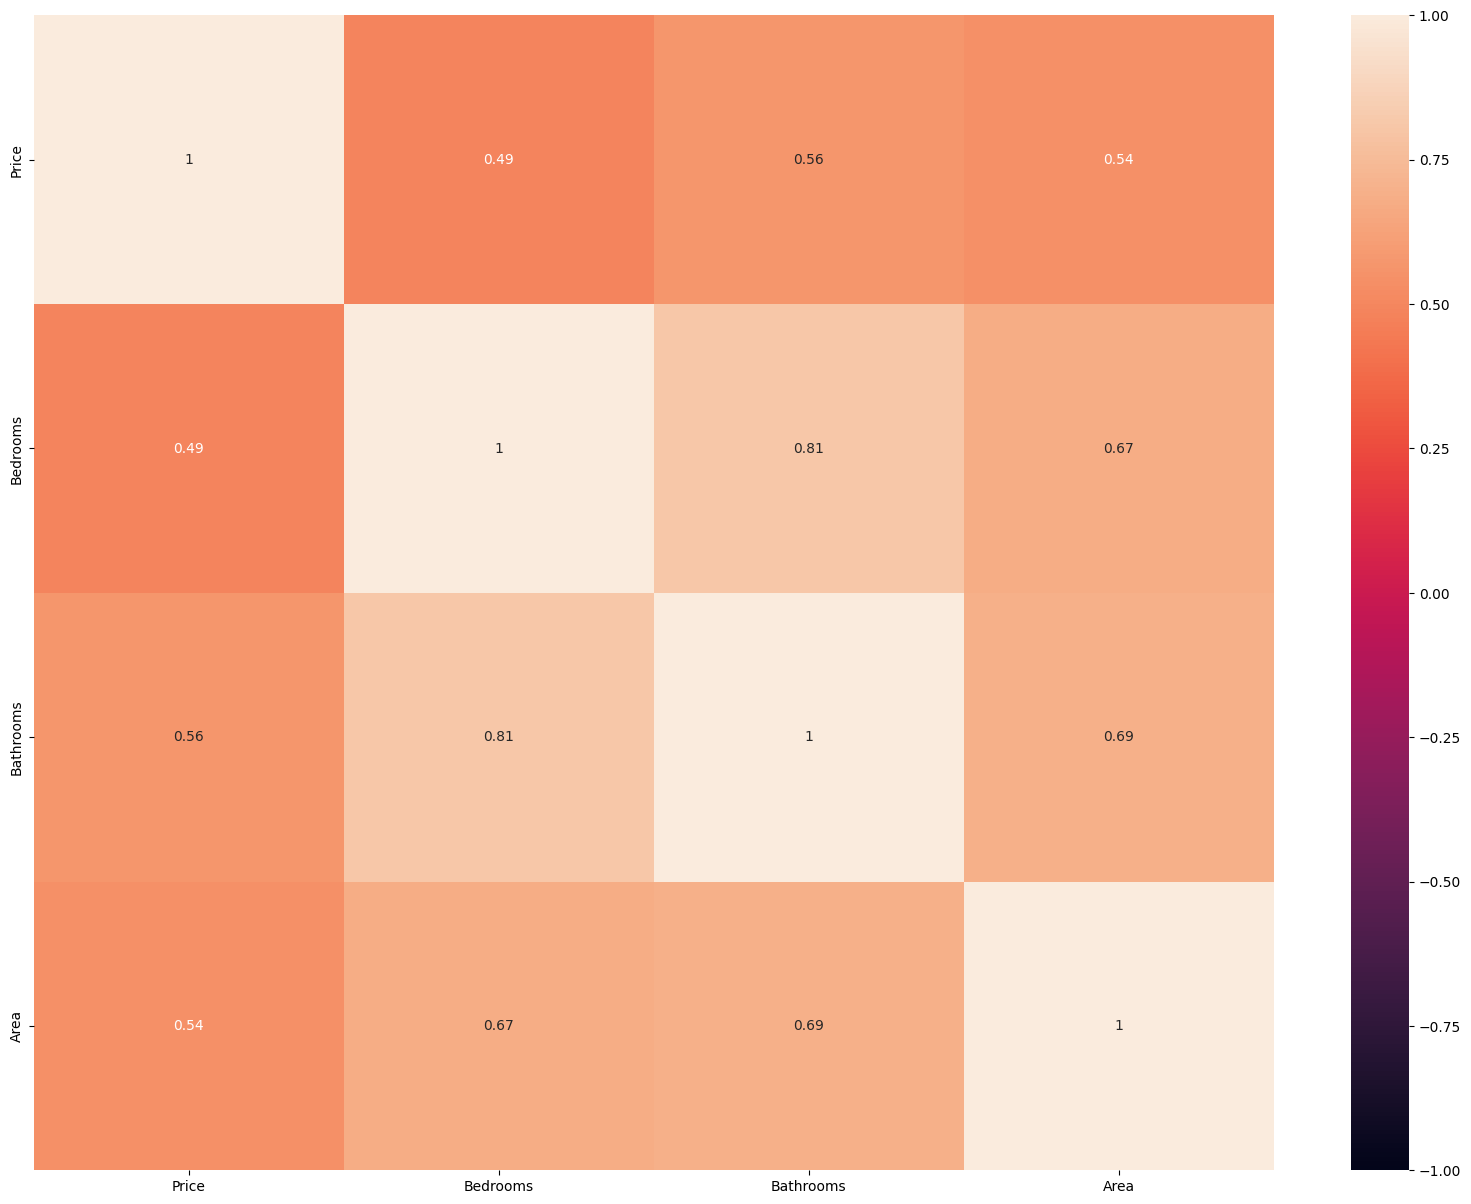

In [239]:
df.groupby(["Type"]).size().plot(kind="bar")
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


In [240]:
df_split = np.array_split(df, 4)
CX=[]
CY=[]
old_CX=[]
old_CY=[]
for i in df_split:
  CY.append(i["Price"].mean())
  CX.append(i["Area"].mean())


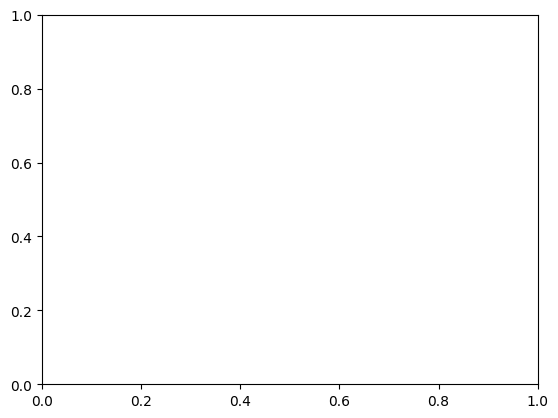

In [241]:
new_df = pd.DataFrame()
def calc_dist_of_each_point_to_each_centroid():
  for i in new_df.index:
    new_df.loc[i,"Error0"]=dist(new_df.loc[i, "Area"],CX[0],new_df.loc[i, "Price"],CY[0])
    new_df.loc[i,"Error1"]=dist(new_df.loc[i, "Area"],CX[1],new_df.loc[i, "Price"],CY[1])
    new_df.loc[i,"Error2"]=dist(new_df.loc[i, "Area"],CX[2],new_df.loc[i, "Price"],CY[2])
    new_df.loc[i,"Error3"]=dist(new_df.loc[i, "Area"],CX[3],new_df.loc[i, "Price"],CY[3])
def select_new_centroids():
    c = [[], [], [], []]
    for i in new_df.index:
        temp = [new_df.loc[i, "Error0"], new_df.loc[i, "Error1"], new_df.loc[i, "Error2"], new_df.loc[i, "Error3"]]
        temp.sort()
        if new_df.loc[i, "Error0"] == temp[0]:
            c[0].append({"x": new_df.loc[i, "Area"], "y": new_df.loc[i, "Price"]})
        elif new_df.loc[i, "Error1"] == temp[0]:
            c[1].append({"x": new_df.loc[i, "Area"], "y": new_df.loc[i, "Price"]})
        elif new_df.loc[i, "Error2"] == temp[0]:
            c[2].append({"x": new_df.loc[i, "Area"], "y": new_df.loc[i, "Price"]})
        else:
            c[3].append({"x": new_df.loc[i, "Area"], "y": new_df.loc[i, "Price"]})
    
    index = 0
    for i in c:
        if len(i) > 0:
            sumx = sum(j["x"] for j in i)
            sumy = sum(j["y"] for j in i)
            avgx = sumx / len(i)
            avgy = sumy / len(i)
            CX[index] = avgx
            CY[index] = avgy
        index += 1
    
    return c



def converged():
  convergence=True
  for i in range(0,4):
    if abs(old_CX[i]-CX[i])>0.3 or abs(old_CY[i]-CY[i])>0.3:
      convergence=False
      break
  return convergence
calc_dist_of_each_point_to_each_centroid()
old_CX=CX.copy()
old_CY=CY.copy()
clusters=select_new_centroids()
while not converged():
  calc_dist_of_each_point_to_each_centroid()
  old_CX=CX.copy()
  old_CY=CY.copy()
  select_new_centroids()
clusters1=[{"x":[],"y":[]},{"x":[],"y":[]},{"x":[],"y":[]},{"x":[],"y":[]}]
row_index=0
for i in clusters:
  for j in i:
    clusters1[row_index]["x"].append(j["x"])
    clusters1[row_index]["y"].append(j["y"])
  row_index +=1
clusters1
fig = plt.figure()
ax1 = fig.add_subplot()

In [242]:
ax1.scatter(clusters1[0]["x"], clusters1[0]["y"], s=10, c='b', marker="s")
ax1.scatter(clusters1[1]["x"], clusters1[1]["y"], s=10, c='r', marker="o")
ax1.scatter(clusters1[2]["x"], clusters1[2]["y"], s=10, c='g', marker="^")
ax1.scatter(clusters1[3]["x"], clusters1[3]["y"], s=10, c='m', marker="P")
plt.show()
